Visualisations for Event Catalogue - DRAFT, testing utils

In [2]:
# importing libraries to create country visualisations

import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

import json
import os
from multiprocessing import Pool

import sys
from pathlib import Path 

from fuzzywuzzy import process

# set path to utils
# notebook_dir = os.chdir("/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils")
notebook_dir = os.getcwd()
notebook_name = "experiments_event_cat_vis_01.ipynb"

PATH = Path(notebook_dir) / Path(notebook_name)

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths
setup_project_paths(PATH)

from utils_plotting import plot_time_series, plot_random_monthly_and_yearly_data, plot_feature_histograms, plot_contry_period_map
from utils_annual_aggregation import aggregate_monthly_to_yearly
from utils_feature_eng_per_100k import feature_eng_fat_per_100k

#from utils_cumulative_distribution import calculate_global_cumulative_distribution

from utils_global_probabilities import calculate_global_probabilities
from utils_country_probabilities import calculate_all_country_probabilities
from utils_return_periods import calculate_return_periods
from utils_check_expected_features import check_expected_features    
from utils_date_index import calculate_date_from_index 
from utils_country_id_csv_to_json import country_id_csv_to_json
from utils_get_country_names_by_ids import get_country_names_by_ids
from utils_get_country_id_by_name import get_country_id_by_name

from utils_annual_aggregation import aggregate_monthly_to_yearly # changing aggregation level 
from utils_feature_eng_per_100k import feature_eng_fat_per_100k # calculating fatailities per 100k

ImportError: cannot import name 'plot_time_series' from 'utils_plotting' (/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils/utils_plotting.py)

Check Versions Used

In [10]:
# checking library versions 
print(np.__version__) # 1.26.4
print(pd.__version__) # 2.2.2
print(sns.__version__) # 0.13.2
print(matplotlib.__version__) # 3.8.4

1.26.4
2.2.2
0.13.2
3.8.4


Loading Data

In [17]:
# loading saved dataframes 

df = pd.read_pickle("/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/raw_viewser/simon_full_base_01_viewser_df.pkl")
# can also define path to read in pickle file


In [18]:
df.columns

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'sb_best', 'ns_best', 'os_best', 'pop_gpw_sum'],
      dtype='object')

Data transformations

In [24]:
get_country_names_by_ids([248, 250, 252, 253, 254])

{248: 'USSR', 250: 'USSR', 252: 'USSR', 253: 'USSR', 254: 'USSR'}

In [23]:
df_yearly = aggregate_monthly_to_yearly(df)
# unique c_id values only in monthly data are all USSR


Unique 'c_id' values only in monthly data: {248, 250, 252, 253, 254}
Unique 'c_id' values only in yearly data: set()
The 'c_id' feature should have the same unique values in the monthly and yearly data... Keep running


In [26]:
# calculating fatalities per 100k

df_yearly_100k = feature_eng_fat_per_100k(df_yearly)

# column check
df_yearly_100k.columns

Index(['pg_id', 'year_id', 'c_id', 'col', 'row', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_best', 'fatalities_per_100k',
       'sb_per_100k', 'ns_per_100k', 'os_per_100k'],
      dtype='object')

Plotting Data

In [32]:
get_country_id_by_name("Burkina Faso") # need to edit function to be able to do multiple countries?

# all country_ids
country_list = [47, 57, 237, 161, 50, 244, 162, 78, 120, 236, 235, 240, 158]

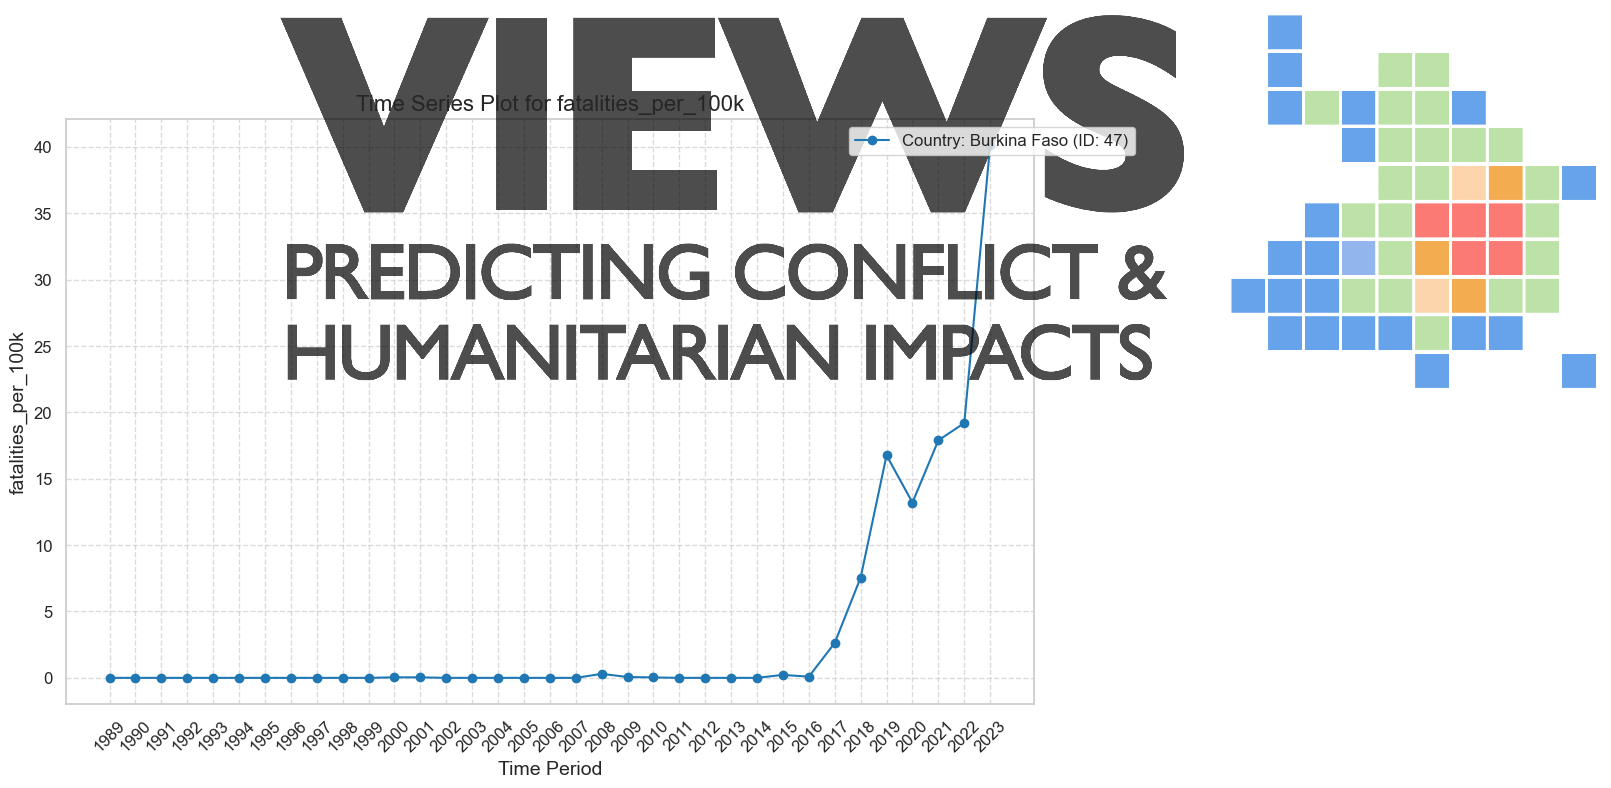

In [34]:
plot_time_series(df_yearly_100k, country_ids=[47], feature="fatalities_per_100k", figsize=(16,8))

# need to find the correct logo png

In [1]:
for country_id in country_list:
    plot_time_series(df_yearly_100k, country_ids=[country_id], feature="fatalities_per_100k", figsize=(16,8))

NameError: name 'country_list' is not defined

Logo not found, please make sure the logo is available in the logos folder


UnboundLocalError: cannot access local variable 'ab' where it is not associated with a value

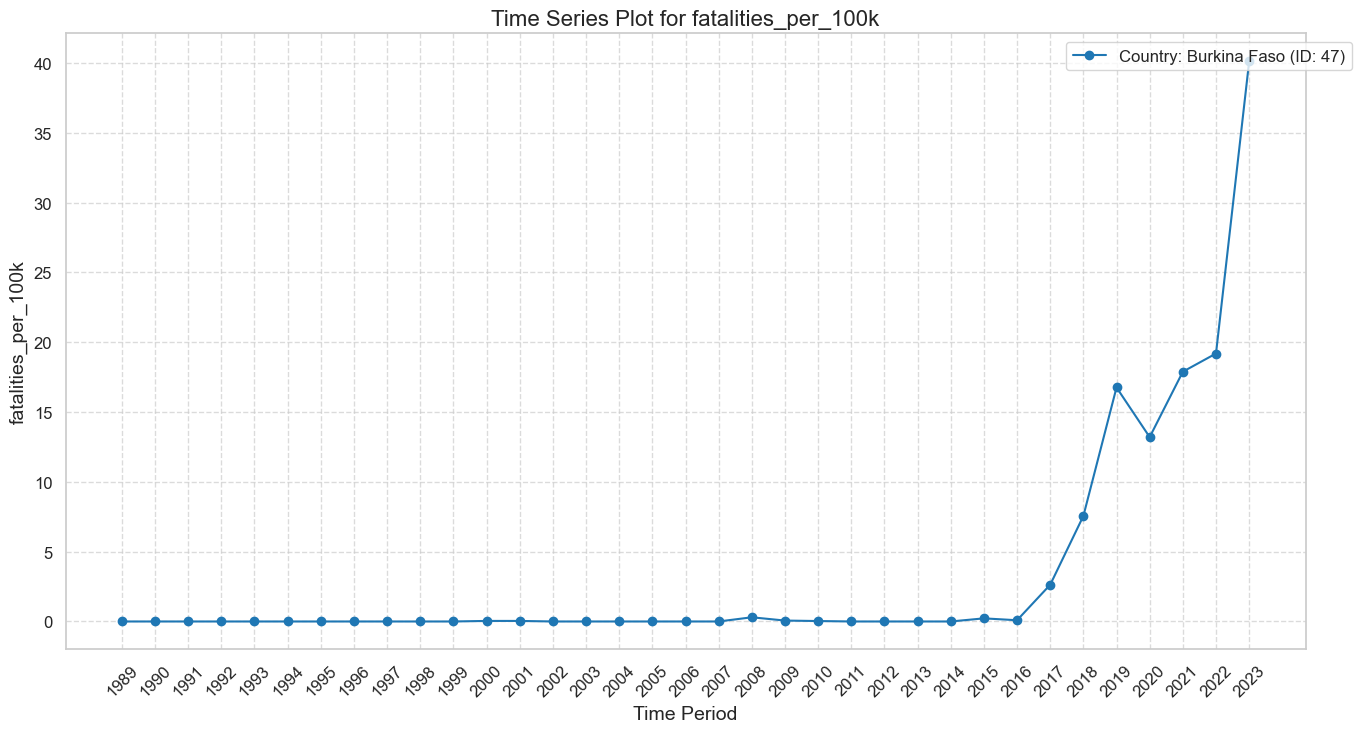

In [37]:
# looping through country_id and call the polot_time_series function for each country_id
for country_id in country_list:
    plot_time_series(df_yearly_100k, country_ids=[country_id], feature="fatalities_per_100k", figsize=(16,8)) # save all figures to generated folder
    plt.savefig(f"data/generated/conflict_history/conflict_history_{country_id}.png")
    plt.close()

# do we care about having different colours for each country? For sake of time have not edited the plotting function to enable it when doing multiple countries for output

Logo not found, please make sure the logo is available in the logos folder


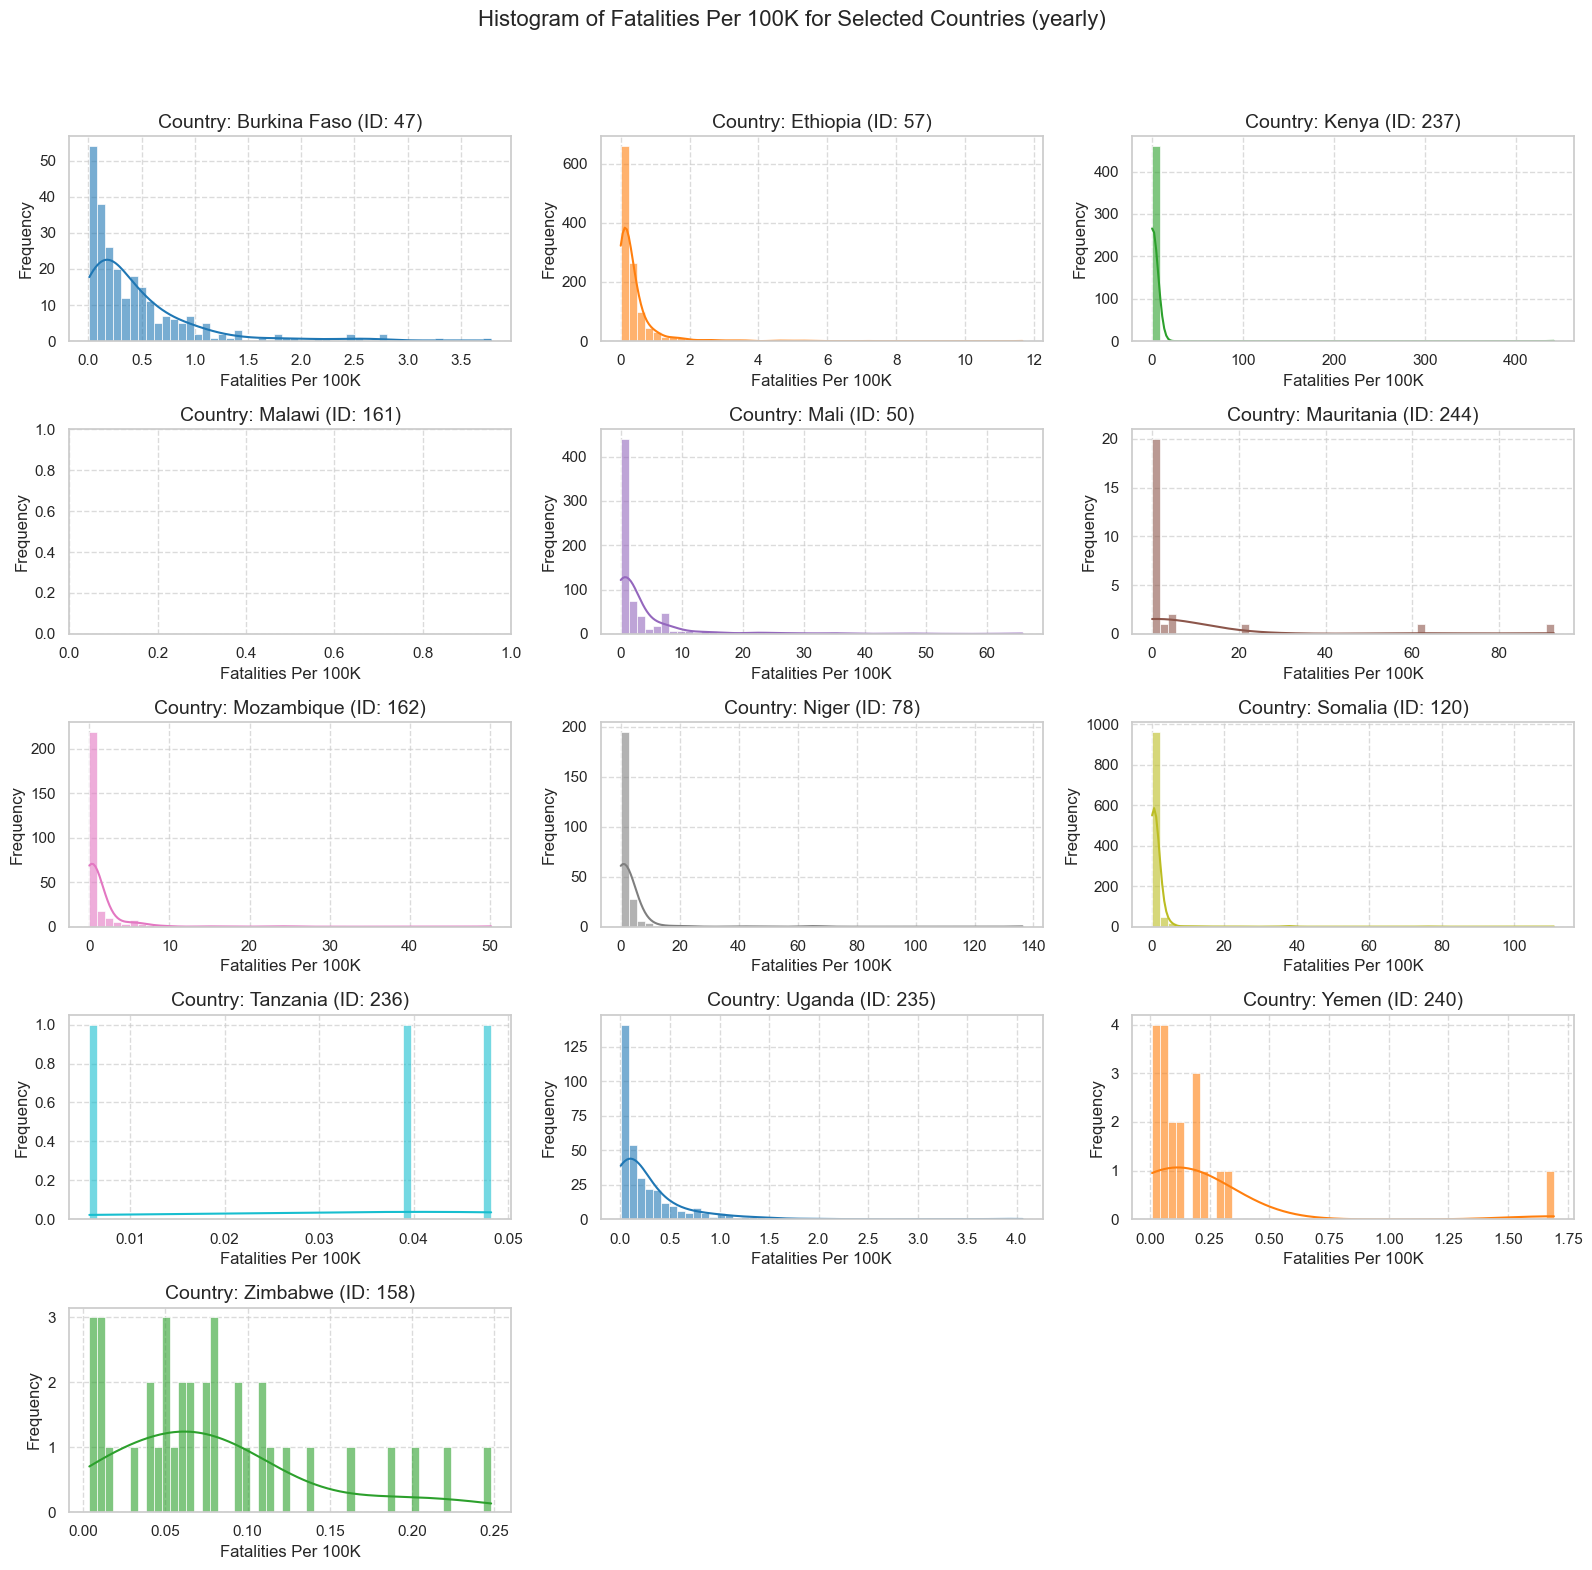

In [33]:
# example histogram plot 

plot_feature_histograms(df_yearly_100k, country_list[0:13], feature="fatalities_per_100k", figsize=(16,16))